
**Importing required libraries**

In [52]:
from math import *
import seaborn as sns
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

**Generating a random surface profile using bounded functions All calculations have been performed on this curve in the range (6,29)**

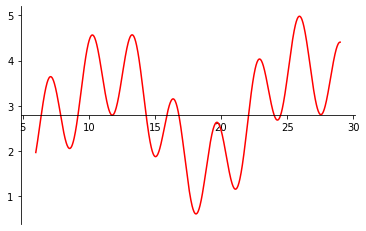

In [53]:
x = np.linspace(6,29,1000)
y = 0.78*np.arctan(x/2)+np.sin(2*x)+0.8*np.cos(x/2)+0.7*np.sin(x/4)+1.3*np.arctan(x/2)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.plot(x,y, 'r-')
plt.show()


**Defining various functions that we can use later**

In [54]:
def func(n):
    return lambda x:(0.78*np.arctan(x/2)+np.sin(2*x)+0.8*np.cos(x/2)+0.7*np.sin(x/4)+1.3*np.arctan(x/2))**n

def abs_func():
    return lambda x:np.absolute(0.78*np.arctan(x/2)+np.sin(2*x)+0.8*np.cos(x/2)+0.7*np.sin(x/4)+1.3*np.arctan(x/2))

def neg_func():
    return lambda x:(0.78*np.arctan(x/2)+np.sin(2*x)+0.8*np.cos(x/2)+0.7*np.sin(x/4)+1.3*np.arctan(x/2))*(-1)

In [55]:
#Maximum profile peak height(Rp)
Rp = sp.optimize.minimize_scalar(neg_func(), bounds=[6,29], method='bounded')
print(Rp)

     fun: -4.982808168668448
 message: 'Solution found.'
    nfev: 13
  status: 0
 success: True
       x: 25.92403423112637


In [56]:
#Maximum profile valley depth(Rv)
Rv = sp.optimize.minimize_scalar(func(1), bounds=[6,29], method='bounded')
print(Rv)

     fun: 1.8759802967572137
 message: 'Solution found.'
    nfev: 15
  status: 0
 success: True
       x: 15.0496336188356


In [57]:
#Maximum height(Rz)
Rz = -Rp.fun - Rv.fun
print(Rz)

3.106827871911234


In [58]:
#Average Deviation(Ra)
Ra = sp.integrate.quad(abs_func(),6,29)[0]*(1/23)
print(Ra)

2.995835752382599


In [59]:
#Root mean square deviation(Rq)
Rq = np.sqrt(sp.integrate.quad(func(2),6,29))[0]*np.sqrt(1/23)
print(Rq)

3.169977620273772


In [60]:
#Skewness(Rsk)
Rsk=(sp.integrate.quad(func(3),6,29)[0]*(1/23))//(Rq**(3))
print(Rsk)

1.0


In [61]:
#Kurtosis(Rku)
Rku=(sp.integrate.quad(func(4),6,29)[0]*(1/23))//(Rq**(4))
print(Rku)

1.0
